In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Muat data
data = pd.read_csv('data_balita.csv')

# Tampilkan beberapa baris dari data
data

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [4]:
print(data['Jenis Kelamin'].value_counts())

Jenis Kelamin
perempuan    61002
laki-laki    59997
Name: count, dtype: int64


In [5]:
print(data['Status Gizi'].value_counts())

Status Gizi
normal              67755
severely stunted    19869
tinggi              19560
stunted             13815
Name: count, dtype: int64


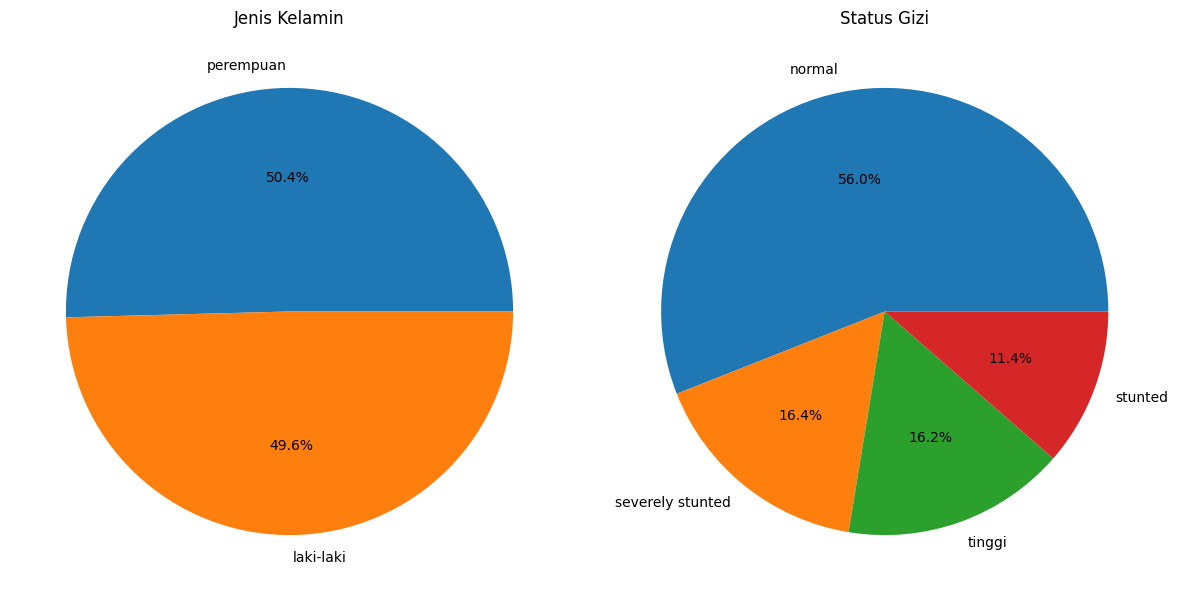

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(data['Jenis Kelamin'].value_counts(), labels=data['Jenis Kelamin'].value_counts().index, autopct='%1.1f%%')
axes[0].set_title('Jenis Kelamin')
axes[1].pie(data['Status Gizi'].value_counts(), labels=data['Status Gizi'].value_counts().index, autopct='%1.1f%%')
axes[1].set_title('Status Gizi')
plt.tight_layout()
plt.show()

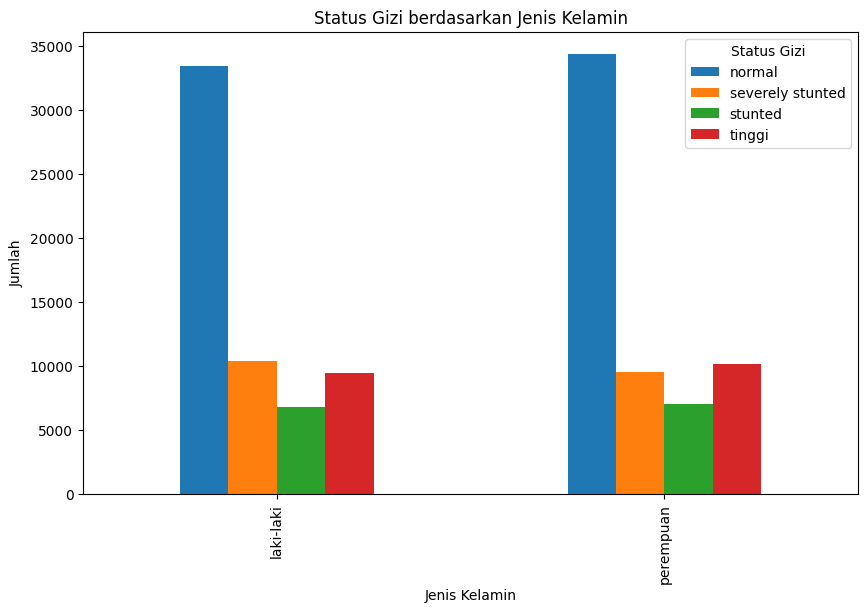

In [7]:
data_kelamin = data.groupby(['Jenis Kelamin', 'Status Gizi']).size().unstack()
data_kelamin.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.title('Status Gizi berdasarkan Jenis Kelamin')
plt.legend(title='Status Gizi')
plt.show()

In [8]:
#data processing
le = LabelEncoder()
data['Jenis Kelamin'] = le.fit_transform(data['Jenis Kelamin'])
data['Status Gizi'] = le.fit_transform(data['Status Gizi'])

In [9]:
# Pisahkan fitur dan target
X = data[['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']]
y = data['Status Gizi']

In [10]:
# data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Buat dan latih model decision tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
# evaluasi moodel pada training
y_pred_train = clf.predict(X_train)
acc_train_tree = accuracy_score(y_train, y_pred_train)
print('Accuracy of Decision Tree on Training:', acc_train_tree)

Accuracy of Decision Tree on Training: 1.0


In [13]:
# evaluasi model pada data testing
y_pred_test = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print('Accuracy of Decision Tree on Test:', acc_test)

Accuracy of Decision Tree on Test: 0.9990082644628099


In [14]:
# cross validation pada data training
cv = KFold(n_splits=10, shuffle=True, random_state=0)
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))

Cross-validation scores: [0.99772727 0.99896694 0.99803719 0.99938017 0.99803719 0.99938017
 0.99845041 0.99865702 0.99793388 0.99793367]
Mean cross-validation score: 0.9984503918767647
